<img src="fao-logo-fr.svg" />

# <u>Travail préparatoire

## <u> Importation des librairies

Pour cette étude, nous allons utiliser les librairies Numpy pour les calculs, Pandas pour la gestion des dataframes, Matplotlib et Seaborn pour la création de graphes, et Folium pour la création de cartes.

In [1]:
# importation des librairies utilisées
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## <u> Importation des fichiers csv

Quatre fichiers de données sont à notre disposition. Nous utiliserons 2 fichiers supplémentaires pour la création de cartes.

In [2]:
# importation des fichiers csv
aide = pd.read_csv('aide_alimentaire.csv')
dispo = pd.read_csv('dispo_alimentaire.csv')
pop = pd.read_csv('population.csv')
sous_nut = pd.read_csv('sous_nutrition.csv')
# importation pour la création de cartes
pays_geo = 'world_countries.json'
code = pd.read_csv("pays_code_ISO.csv") #fichier csv créé avec 2 colonnes : Zone (i.e. pays) et id

## <u> Vérification des types de données et ajustement

Trois des quatre fichiers possèdent une colonne "Valeur" ne contenant pas les mêmes informations. Nous allons renommer ces colonnes pour clarifier les choses :

In [3]:
aide = aide.rename(columns={"Valeur":"Quantité (en t)"})
pop = pop.rename(columns={"Valeur":"Population totale (en milliers)"})
sous_nut = sous_nut.rename(columns={"Valeur":"Personnes sous-alimentés (en millions)"})

Les variables des trois premiers fichiers sont dans les types attendus mais le dataframe sous_nutrition ne possède pas les bons types :

In [4]:
# vérification des types pour le df sous-nutrition
sous_nut.dtypes

Zone                                      object
Année                                     object
Personnes sous-alimentés (en millions)    object
dtype: object

Présence d'anomalies de type : les variables 'Année' et 'Valeur' sont des objets. Modifions-les pour avoir des entiers pour les années et des nombres décimaux pour les valeurs.

In [5]:
# modification des années
années = {"2012-2014":2013, "2013-2015":2014, "2014-2016":2015, "2015-2017":2016, "2016-2018":2017, "2017-2019":2018}
sous_nut["Année"] = sous_nut["Année"].map(années)

Certaines valeurs sont entrées comme "<0.1". Nous allons les remplacer par la valeur 0 puis nous effectuerons le changement de type.

In [6]:
# modification des valeurs et changement du type
sous_nut.loc[sous_nut['Personnes sous-alimentés (en millions)'] == '<0.1', 'Personnes sous-alimentés (en millions)'] = 0
sous_nut['Personnes sous-alimentés (en millions)'] = pd.to_numeric(sous_nut['Personnes sous-alimentés (en millions)'])

# <u> Etude de la sous-nutrition en 2017

## <u>Proportion de personnes en état de sous-nutrition pour l'année 2017 (Marc 1)

Concentrons-nous sur les valeurs de 2017 du dataframe sous_nutrition (203 valeurs) :

In [7]:
# création du df sous_nut2017
sous_nut2017 = sous_nut.loc[sous_nut['Année'] == 2017]

Intéressons-nous aux valeurs manquantes :

In [8]:
# calcul du taux de valeurs manquantes (identique pour chaque année)
sous_nut2017.isnull().mean()

Zone                                      0.000000
Année                                     0.000000
Personnes sous-alimentés (en millions)    0.487685
dtype: float64

Nous avons plus de 48% de valeurs manquantes dans la colonne "Valeur". Celles-ci concernent des pays développés (Allemagne, Etats-Unis), des pays de petite taille (Andorre, Lichtenstein) ou des pays en guerre (Yémen). Les estimations de sous-nutrition pour ces pays ne peuvent donc utilisées les mêmes méthodes.

Pour connaître le nombre de personnes en sous-nutrition, nous effectuons la somme des valeurs connues de sous-nutrition.

In [9]:
# calcul de la somme des valeurs de sous-nutrition
a = sous_nut2017["Personnes sous-alimentés (en millions)"].sum()
print (a, "millions de personnes au minimum étaient en sous-nutrition en 2017")

535.7 millions de personnes au minimum étaient en sous-nutrition en 2017


<b> Calcul de la population mondiale en 2017

In [10]:
# création du df pop2017
pop2017 = pop.loc[pop["Année"] == 2017]
pop2017 = pop2017.drop(columns="Année", axis=1)

In [11]:
# calcul de la population mondiale en millions
pop_mondiale2017 = pop2017["Population totale (en milliers)"].sum() / 1000
print("La population mondiale était de %d millions de personnes en 2017" %(pop_mondiale2017))

La population mondiale était de 7548 millions de personnes en 2017


<b> Calcul du taux de sous-nutrition

In [12]:
prop_sous_nut = a * 100 / pop_mondiale2017
print("Le taux de sous-nutrition en 2017 était de %.1f%%" %(prop_sous_nut))

Le taux de sous-nutrition en 2017 était de 7.1%


## <u>Pays où la proportion de personnes sous-alimentés est la plus forte en 2017 (Mélanie 1)

In [13]:
# création d'un nouveau df avec la jointure des df pop2017 et sous_nut2017
proportion = pd.merge(pop2017, sous_nut2017, left_on="Zone", right_on="Zone", how='inner')

# passage des valeurs de millions à milliers
proportion["Personnes sous-alimentés (en millions)"] = proportion["Personnes sous-alimentés (en millions)"]*1000
proportion = proportion.rename(columns={"Personnes sous-alimentés (en millions)":"Personnes sous-alimentés (en milliers)"})

# suppression d'une colonne "année" en double
# proportion.drop(columns="Année_y", axis=1)

In [14]:
# calcul du taux de sous-nutrition dans une nouvelle colonne
proportion["Taux de sous-nutrition (en %)"] = round(proportion["Personnes sous-alimentés (en milliers)"] * 100 / proportion["Population totale (en milliers)"],2)

# classement décroissant des valeurs par taux de sous-nutrition
proportion = proportion.sort_values("Taux de sous-nutrition (en %)", ascending=False)
proportion.head(20)

,Zone,Population totale (en milliers),Année,Personnes sous-alimentés (en milliers),Taux de sous-nutrition (en %)
78,Haïti,10982.366,2017,5300.0,48.26
157,République populaire démocratique de Corée,25429.825,2017,12000.0,47.19
108,Madagascar,25570.512,2017,10500.0,41.06
103,Libéria,4702.226,2017,1800.0,38.28
100,Lesotho,2091.534,2017,800.0,38.25
183,Tchad,15016.753,2017,5700.0,37.96
161,Rwanda,11980.961,2017,4200.0,35.06
121,Mozambique,28649.018,2017,9400.0,32.81
186,Timor-Leste,1243.258,2017,400.0,32.17
0,Afghanistan,36296.113,2017,10500.0,28.93


<b> Visualisation des résultats

Text(0, 0.5, 'Pays')

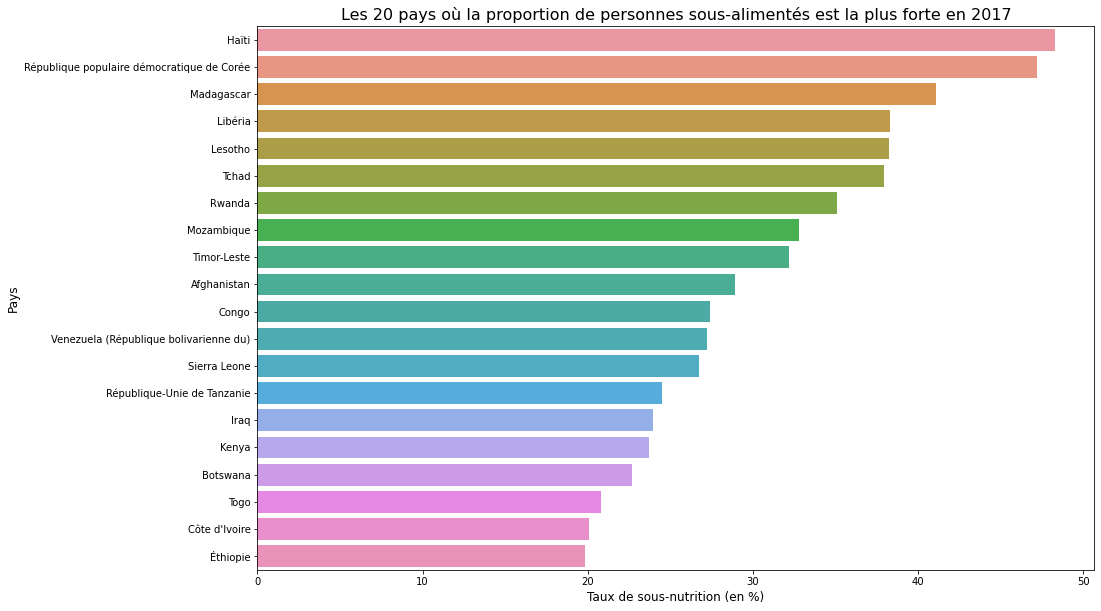

In [15]:
# création du graphe 1
plt.figure(figsize=(15,10))
fig1 = sns.barplot(x="Taux de sous-nutrition (en %)", y="Zone", data=proportion.iloc[0:20])
fig1.set_title("Les 20 pays où la proportion de personnes sous-alimentés est la plus forte en 2017", size=16)
fig1.set_xlabel("Taux de sous-nutrition (en %)", size=12)
fig1.set_ylabel("Pays", size=12)

<b> Cartographie

In [16]:
# création d'une carte vierge
m = folium.Map(location=[0, 20], zoom_start=3)
# intégration d'une colonne id au df proportion
proportion_map = proportion.merge(code, left_on="Zone", right_on="Zone", how="inner")

In [17]:
# création de la carte choroplèthe
folium.Choropleth(
    geo_data=pays_geo,
    name="sous-nut",
    data=proportion_map,  #dataframe
    columns=["id", "Taux de sous-nutrition (en %)"],
    key_on="feature.id", 
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Taux de sous-nutrition par pays (en %)",
).add_to(m)

folium.LayerControl().add_to(m)

m

# <u> Etude de la disponibilité alimentaire en 2017

## <u>Nombre théorique de personnes pouvant être nourries (Marc 2)

Le fichier "dispo_alimentaire.csv" est riche en informations sur l'année 2017. Nous allons isolés les colonnes qui vont nous servir dans un autre DataFrame :

In [18]:
# création d'un df sur la disponibilité alimentaire par pays
dispo_alim = dispo.groupby("Zone", as_index=False)["Disponibilité alimentaire (Kcal/personne/jour)"].sum()
dispo_alim

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


Procédons à une jointure entre ce DataFrame et le df pop2017 pour notre calcul :

In [19]:
# jointure des df dispo_alim et pop2017
dfcalcul = pd.merge(pop2017, dispo_alim, left_on="Zone", right_on="Zone", how='inner')

Rajoutons une colonne calcul qui nous donnera la disponibilité alimentaire totale pour chaque pays.

Nous effectuons ensuite la somme de toutes ces valeurs divisée par la valeur moyenne des besoins énergétiques (2300kcal/jour/pers).

In [20]:
# ajout de la colonne de calcul
dfcalcul["calcul"] = dfcalcul["Disponibilité alimentaire (Kcal/personne/jour)"] * dfcalcul["Population totale (en milliers)"]

# somme de la colonne calcul
x=dfcalcul.calcul.sum() / 2300 /1e6 #valeur apport énergétique journalière moyenne
print("%.2f Milliards de personnes pouvaient être nourries en 2017." %(x))

9.10 Milliards de personnes pouvaient être nourries en 2017.


## <u> Nombre théorique de personnes pouvant être nourries grâce à la disponibilité alimentaire des végétaux (Marc 3)

Nous procédons de la même manière pour créer un dataframe contenant les informations des produits d'origine végétale.

In [21]:
# création d'un df des produits d'origine végétale
dispo_veg = dispo[dispo["Origine"] == "vegetale"]

In [22]:
# modification du df pour garder la disponibilité alimentaire par pays
dispo_veg = dispo_veg.groupby("Zone", as_index=False)["Disponibilité alimentaire (Kcal/personne/jour)"].sum()
dispo_veg

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,1871.0
1,Afrique du Sud,2533.0
2,Albanie,2203.0
3,Algérie,2915.0
4,Allemagne,2461.0
...,...,...
169,Émirats arabes unis,2718.0
170,Équateur,1732.0
171,États-Unis d'Amérique,2698.0
172,Éthiopie,2005.0


La jointure suit la même procédure que précedemment :

In [23]:
# jointure entre pop2017 et dispo_veg
dfcalcul_veg = pd.merge(pop2017, dispo_veg, left_on="Zone", right_on="Zone", how='inner')

Et les calculs sont les mêmes :

In [24]:
# ajout de la colonne de calcul
dfcalcul_veg["calcul"] = dfcalcul_veg["Disponibilité alimentaire (Kcal/personne/jour)"] * dfcalcul_veg["Population totale (en milliers)"]

# somme de la colonne calcul
y=dfcalcul_veg["calcul"].sum() / 2300 / 10e5
print("%.2f Milliards de personnes pouvaient être nourries avec la disponibilité alimentaire en végétaux en 2017." %(y))

7.50 Milliards de personnes pouvaient être nourries avec la disponibilité alimentaire en végétaux en 2017.


## <u> Utilisation de la disponibilité intérieure en 2017 (Marc 4)

La disponibilité intérieure est la somme de ce qui est utilisé pour l'alimentation humaine, pour l'alimentation des animaux, pour la production de semences, pour le traitement et d'autres utilisations et de ce qui est perdu.

In [25]:
result = []
catégories = ["Nourriture", "Pertes", "Semences", "Aliments pour animaux", "Traitement", "Autres Utilisations"] #"Disponibilité intérieure" correspond au total de ces 6 éléments

# boucle pour créer chaque ligne à partir de chaque catégorie et l'ajouter dans le df result
for elem in catégories:
    calc = round(dispo[elem].sum(),2)
    result.append({'catégories':elem , 'valeur':calc})
result = pd.DataFrame(result)

<b> Visualisation des résultats

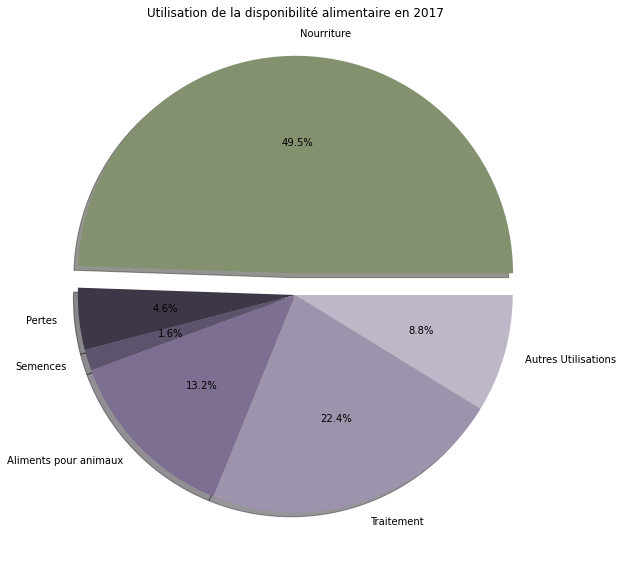

In [26]:
# création du piechart
plt.figure(figsize=(10,10))
expl = [0.1, 0, 0, 0, 0, 0]
colours = ['#84916f', '#3E3748', '#5D536C', '#7C6F91', '#9D93AC', '#BEB7C8']
plt.title("Utilisation de la disponibilité alimentaire en 2017")
plt.pie(result['valeur'], labels=catégories, explode=expl, colors=colours, autopct='%2.1f%%', shadow=True)
plt.show()

## <u> Utilisation des céréales (Julien 1)

Nous allons nous intéresser à l'utilisation des céréales. Pour ce faire nous allons établir une liste des cérales cultivées dans le monde pour créer un dataframe à partir de la disponibilité alimentaire.

In [27]:
# liste des céréales
liste_cereales = ["Avoine", "Blé", "Céréales, Autres", "Maïs", "Millet", "Orge", "Riz (Eq Blanchi)", "Seigle", "Sorgho"]

In [28]:
# création du df de disponibilité des céréales
dispo_cereales = dispo[dispo["Produit"].isin(liste_cereales)]
dispo_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
15568,Îles Salomon,Maïs,vegetale,NaN,NaN,1.0,0.15,0.01,0.03,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15575,Îles Salomon,Orge,vegetale,NaN,NaN,0.0,0.07,NaN,0.01,1.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,NaN
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,NaN,0.0


In [29]:
# création d'un df cereales vide
cereales = []
catégories = ["Nourriture", "Pertes", "Semences", "Aliments pour animaux", "Traitement", "Autres Utilisations"] #"Disponibilité intérieure" correspond au total de ces 6 éléments

# boucle pour créer chaque ligne à partir de chaque catégorie et l'ajouter dans le df cereales
for elem in catégories:
    calc = round(dispo_cereales[elem].sum(),2)
    cereales.append({'catégories':elem , 'valeur':calc})
cereales = pd.DataFrame(cereales)

<b> Visualisation des résultats

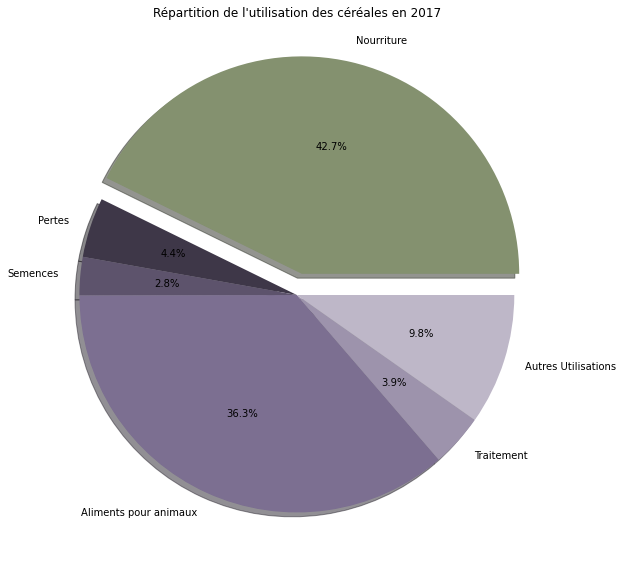

In [30]:
# création du piechart
plt.figure(figsize=(10,10))
expl = [0.1, 0, 0, 0, 0, 0]
colours = ['#84916f', '#3E3748', '#5D536C', '#7C6F91', '#9D93AC', '#BEB7C8']
plt.title("Répartition de l'utilisation des céréales en 2017")
plt.pie(cereales['valeur'], labels=catégories, explode=expl, colors=colours, autopct='%2.1f%%', shadow=True)
plt.show()

## <u> Etude de la disponibilité alimentaire par habitant (Mélanie 3)

In [31]:
dispo_alim2 = dispo_alim.sort_values("Disponibilité alimentaire (Kcal/personne/jour)")
dispo_alim2

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
...,...,...
74,Israël,3610.0
171,États-Unis d'Amérique,3682.0
159,Turquie,3708.0
16,Belgique,3737.0


<b> Visualisation des résultats

Text(0.5, 1.0, 'Les 20 pays où la disponibilité alimentaire par habitant est la plus faible')

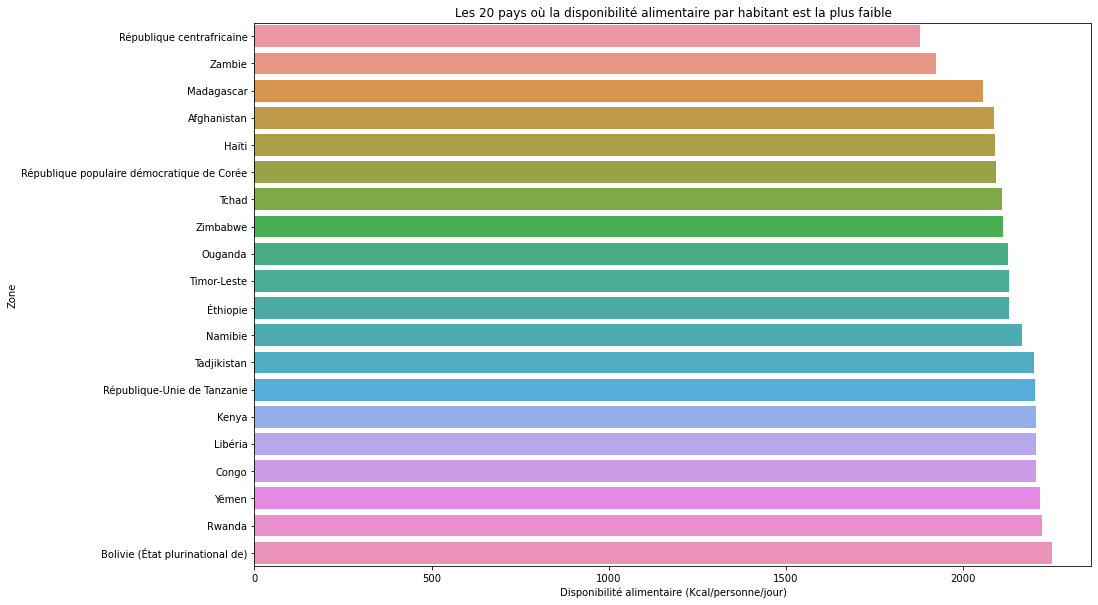

In [32]:
fig2 = plt.figure(figsize=(15,10))      #taille du graphe
fig2 = sns.barplot(x="Disponibilité alimentaire (Kcal/personne/jour)", y="Zone", data=dispo_alim2.iloc[:20])
plt.title("Les 20 pays où la disponibilité alimentaire par habitant est la plus faible")

Text(0.5, 1.0, 'Les 20 pays où la disponibilité alimentaire par habitant est la plus forte')

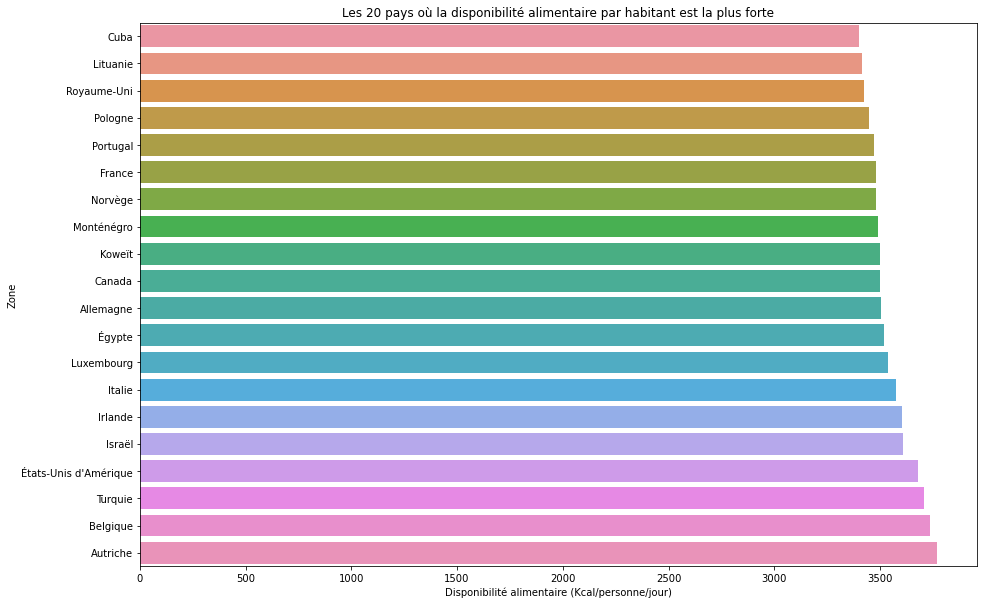

In [33]:
fig3 = plt.figure(figsize=(15,10))      #taille du graphe
fig3 = sns.barplot(x="Disponibilité alimentaire (Kcal/personne/jour)", y="Zone", data=dispo_alim2.iloc[-20:])
plt.title("Les 20 pays où la disponibilité alimentaire par habitant est la plus forte")

<b> Cartographie

In [34]:
# création d'une carte vierge
m2 = folium.Map(location=[0, 20], zoom_start=3)
# intégration d'une colonne id au df proportion
dispo_alim_map = dispo_alim2.merge(code, left_on="Zone", right_on="Zone", how="inner")

In [35]:
# création de la carte choroplèthe
folium.Choropleth(
    geo_data=pays_geo,
    name="dispo",
    data=dispo_alim_map,  #dataframe
    columns=["id", "Disponibilité alimentaire (Kcal/personne/jour)"],
    key_on="feature.id", 
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Disponibilité alimentaire (Kcal/personne/jour)",
).add_to(m2)

folium.LayerControl().add_to(m2)

m2

## <u> Etude d'un cas particulier : la Thaïlande (Julien 2)

Lors de ses travaux, mon prédecesseur s'est intéressé à la production de Manioc en Thaïlande :

In [36]:
manioc_thai = dispo[(dispo["Zone"] == "Thaïlande") & (dispo["Produit"] == "Manioc")]
manioc_thai

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


Nous vérifions bien que la disponibilité intérieure est égale à la somme de l'utilisation humaine, de l'utilisation animale, des pertes, des semences, du traitement et des autres utilisations

In [37]:
# calcul du taux d'exportation du manioc par la Thaïlande
taux = manioc_thai["Exportations - Quantité"] * 100 / manioc_thai["Production"]
print("%.1f%% de la production thai est exportée!" %(taux))

83.4% de la production thai est exportée!


Nous pouvons récupérer le taux de sous-nutrition en Thaïlande en 2017 :

In [38]:
sous_nut[(sous_nut["Zone"] == "Thaïlande") & (sous_nut["Année"] == 2017)] #ou directement avec sous_nut2017

,Zone,Année,Personnes sous-alimentés (en millions)
1114,Thaïlande,2017,6.2


6.2 Millions de personnes étaient en sous-nutrition la même année.

La valeur énergétique moyenne du manioc est de 1400kcal/kg. Nous pouvons donc calculer le nombre de personnes qui pourraient être nourries :

In [39]:
# calcul de la valeur énergétique
val_ener = manioc_thai["Exportations - Quantité"] * 1400 * 1e6
# calcul de la valeur énergétique journalière correspondante
val_ener_journ = val_ener / 365
# calcul du nombre de personnes pouvant être nourries chaque jour
nb_pers = val_ener_journ / 2300 /1e6
print("%.2f millions de personnes pourraient être nourries avec le manioc thai." %(nb_pers))

42.05 millions de personnes pourraient être nourries avec le manioc thai.


# <u> Aide alimentaire

## <u> Pays ayant bénéficié le plus de l'aide alimentaire depuis 2013 (Mélanie 2)

Pour déterminer les pays ayant bénéficié le plus de l'aide alimentaire, nous utiliserons le fichier "aide_alimentaire", en cumulant les valeurs fournies selon le pays, puis nous ordonnerons les résultats par ordre décroissant.

In [40]:
# création du df d'aide alimentaire cumulée
aide_cum = aide.groupby("Pays bénéficiaire", as_index=False)["Quantité (en t)"].sum()
aide_cum = aide_cum.sort_values("Quantité (en t)", ascending=False)
aide_cum["Proportion de l'aide (en %)"]= round(aide_cum["Quantité (en t)"] * 100 / aide_cum["Quantité (en t)"].sum(),2)
aide_cum

,Pays bénéficiaire,Quantité (en t),Proportion de l'aide (en %)
50,République arabe syrienne,1858943,16.84
75,Éthiopie,1381294,12.52
70,Yémen,1206484,10.93
61,Soudan du Sud,695248,6.30
60,Soudan,669784,6.07
...,...,...,...
73,Égypte,1122,0.01
69,Vanuatu,802,0.01
67,Timor-Leste,116,0.00
24,Géorgie,70,0.00


In [41]:
ac = (aide_cum["Proportion de l'aide (en %)"].iloc[0:5]).sum()
print("l'aide alimentaire pour les 5 premiers pays de cette liste a représenté", ac, "% du total de l'aide alimentaire mondiale")

l'aide alimentaire pour les 5 premiers pays de cette liste a représenté 52.66 % du total de l'aide alimentaire mondiale


<b> Visualisation des résultats

Text(0.5, 0, "Quantité de l'aide en millions de tonnes")

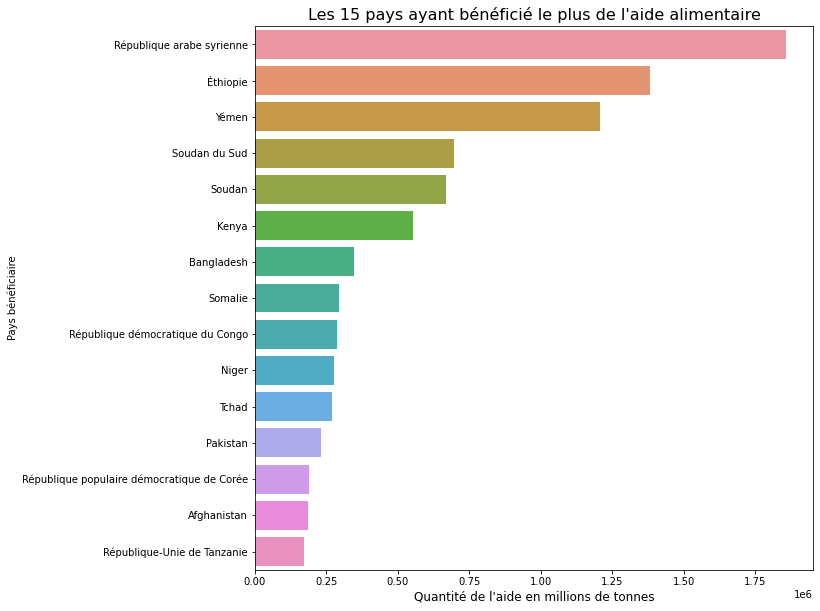

In [42]:
fig4 = plt.figure(figsize=(10,10))      # taille du graphe
fig4 = sns.barplot(x="Quantité (en t)", y="Pays bénéficiaire", data=aide_cum.iloc[0:15])
fig4.set_title("Les 15 pays ayant bénéficié le plus de l'aide alimentaire", size=16)
fig4.set_xlabel("Quantité de l'aide en millions de tonnes", size=12)

<b> Cartographie

In [43]:
# création d'une carte vierge
m3 = folium.Map(location=[0, 20], zoom_start=3)
# intégration d'une colonne id au df proportion
aide_map = aide_cum.merge(code, left_on="Pays bénéficiaire", right_on="Zone", how="inner")

In [44]:
# création de la carte choroplèthe
folium.Choropleth(
    geo_data=pays_geo,
    name="aide",
    data=aide_map,  #dataframe
    columns=["id", "Quantité (en t)"],
    key_on="feature.id", 
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Quantité (en t)",
).add_to(m3)

folium.LayerControl().add_to(m3)

m3

## Aide cumulée par habitant

Les résultats précédents ne tiennent pas compte du nombre d'habitants. Nous allons donc poursuivre en intégrant les valeurs du fichier population.

Tout d'abord nous allons procéder à un changement de nom pour le Swaziland : 

In [45]:
# changer le nom Swaziland par Eswatini
aide_cum.loc[aide["Pays bénéficiaire"] == "Zwaziland" , "Pays bénéficiaire"] == "Eswatini"

Series([], Name: Pays bénéficiaire, dtype: bool)

Nous allons maintenant réaliser la moyenne des populations des différents pays au cours des 6 années de données que nous possédons. Nous en profitons pour changer le nom des colonnes :

In [46]:
# création d'un df de population moyenne sur les 6 années
pop_moy = round(pop.groupby("Zone", as_index=False)["Population totale (en milliers)"].mean(),3)
pop_moy = pop_moy.rename(columns={"Zone":"Pays bénéficiaire", "Population totale (en milliers)":"Population moyenne (en milliers)"})

Nous pouvons ainsi effectuer la jointure de nos 2 DataFrames :

In [47]:
aide_par_hab = pd.merge(aide_cum, pop_moy, left_on="Pays bénéficiaire", right_on="Pays bénéficiaire", how="inner")
aide_par_hab

,Pays bénéficiaire,Quantité (en t),Proportion de l'aide (en %),Population moyenne (en milliers)
0,République arabe syrienne,1858943,16.84,17965.482
1,Éthiopie,1381294,12.52,102257.220
2,Yémen,1206484,10.93,26828.366
3,Soudan du Sud,695248,6.30,10724.130
4,Soudan,669784,6.07,39402.587
...,...,...,...,...
70,Égypte,1122,0.01,93430.852
71,Vanuatu,802,0.01,274.696
72,Timor-Leste,116,0.00,1209.074
73,Géorgie,70,0.00,4022.550


Nous ajoutons une colonne de calcul de l'aide cumulée par habitant :

In [48]:
aide_par_hab["aide en kg par habitant"] = round(aide_par_hab["Quantité (en t)"]  / aide_par_hab["Population moyenne (en milliers)"],2)
aide_par_hab = aide_par_hab.sort_values("aide en kg par habitant", ascending=False)
aide_par_hab

,Pays bénéficiaire,Quantité (en t),Proportion de l'aide (en %),Population moyenne (en milliers),aide en kg par habitant
0,République arabe syrienne,1858943,16.84,17965.482,103.47
3,Soudan du Sud,695248,6.30,10724.130,64.83
2,Yémen,1206484,10.93,26828.366,44.97
37,Djibouti,41296,0.37,921.352,44.82
16,Palestine,169684,1.54,4589.531,36.97
...,...,...,...,...,...
61,Iran (République islamique d'),4686,0.04,79079.668,0.06
73,Géorgie,70,0.00,4022.550,0.02
70,Égypte,1122,0.01,93430.852,0.01
69,"Chine, continentale",1298,0.01,1410150.682,0.00


<b> Visualisation des résultats

Text(0, 0.5, 'Pays bénéficiaire')

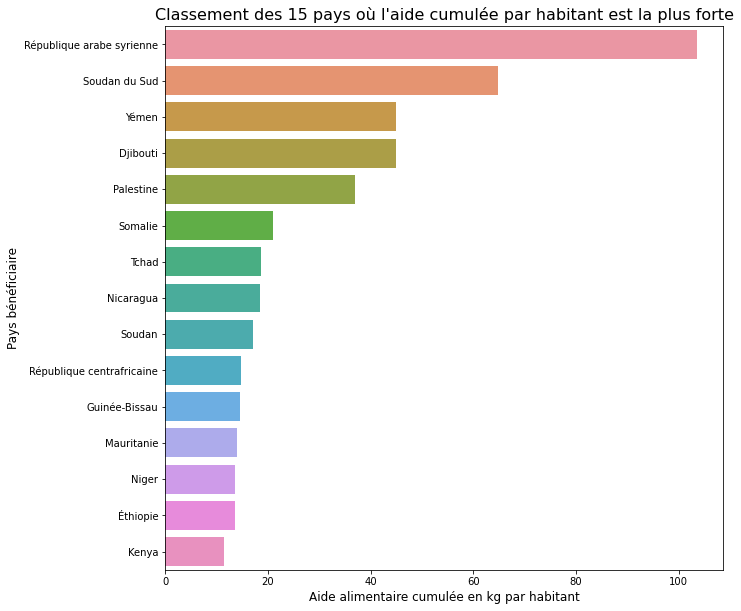

In [49]:
plt.figure(figsize=(10,10))
fig5 = sns.barplot(x="aide en kg par habitant", y="Pays bénéficiaire", data=aide_par_hab.iloc[0:15])
fig5.set_title("Classement des 15 pays où l'aide cumulée par habitant est la plus forte", size=16)
fig5.set_xlabel("Aide alimentaire cumulée en kg par habitant", size=12)
fig5.set_ylabel("Pays bénéficiaire", size=12)

<b> Cartographie

In [50]:
# création d'une carte vierge
m4 = folium.Map(location=[0, 20], zoom_start=3)
# intégration d'une colonne id au df proportion
aide_hab_map = aide_par_hab.merge(code, left_on="Pays bénéficiaire", right_on="Zone", how="inner")

In [51]:
# création de la carte choroplèthe
folium.Choropleth(
    geo_data=pays_geo,
    name="aide par hab",
    data=aide_hab_map,  #dataframe
    columns=["id", "aide en kg par habitant"],
    key_on="feature.id", 
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="aide en kg par habitant",
).add_to(m4)

folium.LayerControl().add_to(m4)

m4

# Export & taux de sous-nut en 2017

In [52]:
export = dispo.groupby("Zone")[["Exportations - Quantité", "Production"]].sum()
export["Taux export en %"] = round(export["Exportations - Quantité"] * 100 / export["Production"],1)
export

,Exportations - Quantité,Production,Taux export en %
Zone,,,
Afghanistan,278.0,11171.0,2.5
Afrique du Sud,11674.0,63263.0,18.5
Albanie,94.0,3964.0,2.4
Algérie,655.0,26359.0,2.5
Allemagne,57431.0,154547.0,37.2
...,...,...,...
Émirats arabes unis,4343.0,1192.0,364.3
Équateur,8002.0,24337.0,32.9
États-Unis d'Amérique,163524.0,894668.0,18.3


In [53]:
prop = pd.merge(export, proportion, left_on="Zone", right_on="Zone", how='inner')
prop = prop.drop(columns=["Exportations - Quantité","Production", "Population totale (en milliers)", "Personnes sous-alimentés (en milliers)"], axis=1)
prop

,Zone,Taux export en %,Année,Taux de sous-nutrition (en %)
0,Afghanistan,2.5,2017,28.93
1,Afrique du Sud,18.5,2017,5.44
2,Albanie,2.4,2017,3.47
3,Algérie,2.5,2017,3.14
4,Allemagne,37.2,2017,NaN
...,...,...,...,...
167,Émirats arabes unis,364.3,2017,3.16
168,Équateur,32.9,2017,8.94
169,États-Unis d'Amérique,18.3,2017,NaN
170,Éthiopie,2.0,2017,19.83


# Etude de l'évolution de la sous-nutrition sur la période 2013-2018

Pour suivre l'évolution de la population mondiale par année, nous créons les DataFrames suivants :

In [54]:
# création du df concernant la population mondiale
pop_mondiale_année = pop.groupby("Année", as_index=False)["Population totale (en milliers)"].sum()

# création du df concernant la sous-nutrition
sous_nut_mondiale = sous_nut.groupby("Année", as_index=False)["Personnes sous-alimentés (en millions)"].sum()

Nous joignons les 2 DataFrames dans un nouveau DataFrame :

In [55]:
# jointure sur l'année
evolution = pd.merge(sous_nut_mondiale, pop_mondiale_année, left_on="Année", right_on="Année", how="inner")

# création d'une colonne et calcul des valeurs
evolution["Taux de sous-nutrition (en %)"] = round(evolution["Personnes sous-alimentés (en millions)"] * 100000 / evolution["Population totale (en milliers)"],2)
evolution

,Année,Personnes sous-alimentés (en millions),Population totale (en milliers),Taux de sous-nutrition (en %)
0,2013,528.1,7210845.848,7.32
1,2014,523.5,7295557.771,7.18
2,2015,524.7,7380067.075,7.11
3,2016,528.6,7464294.742,7.08
4,2017,535.7,7548134.111,7.10
5,2018,544.2,7631368.523,7.13


<b> Visualisation des résultats

<AxesSubplot:title={'center':'Evolution du taux de sous-nutrition entre 2013 & 2018'}, xlabel='Année', ylabel='Taux de sous-nutrition (en %)'>

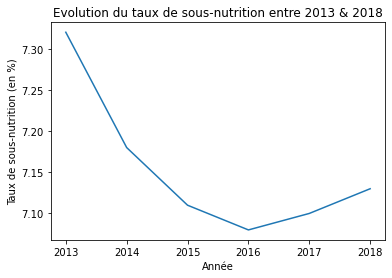

In [56]:
plt.title("Evolution du taux de sous-nutrition entre 2013 & 2018")
sns.lineplot(x=evolution["Année"], y=evolution["Taux de sous-nutrition (en %)"])

Pendant cette période, l'aide alimentaire a évolué :

<AxesSubplot:xlabel='Année', ylabel='Quantité (en t)'>

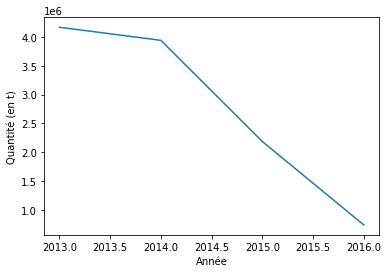

In [57]:
# création du df de l'aide alimentaire totale par année
aide_cumulee_année = aide.groupby("Année", as_index=False)["Quantité (en t)"].sum()
sns.lineplot(x=aide_cumulee_année["Année"], y=aide_cumulee_année["Quantité (en t)"])